# Outline

This project has several sections and will provide you a concise introduction to time series concepts in R. We will learn the essential theory and also practice fitting the four main types of time series models, getting you up and running with all the basics in a little more than an hour!

(1) Introduction to Rhyme Environment

(2) Time Series Data Overview (Theory)

(3) Why Time Series? (Theory)

(4) Key Concepts: Autocorrelation / Autocovariance (Theory)

(5) Key Concepts: Stationarity (Theory)

(6) Checking for Stationarity (Practice)

(7) Transforming for Stationarity: Differencing (Practice)

(8) Transforming for Stationarity: Detrending (Practice)

(9) Basic Model Types: AR(p), MA(q), ARMA(p,q), ARIMA(p,d,q), Decomposition (Theory)

(10) Fitting AR / MA / ARMA / ARIMA models with the Box Jenkins Method (Theory)

(11) Box Jenkins Method: Checking for Stationarity (Practice)

(12) Box Jenkins Method: Transforming for Stationarity & Identifying Model Parameters (Practice)

(13) Box Jenkins Method: Checking the Residuals of the Model Fit (Practice)

(14) Making a Forecast for Each Model (Practice)

(15) Fitting STL (Seasonal Trend Loess) Decomposition Models (Practice)

(16) Where to go Next

# Introduction to Rhyme Environment

Now, let's load the R packages we will need for this project (they should be already installed on your virtual machine).

In [3]:
install.packages("magrittr")
install.packages("tidyverse")
install.packages("scales")
install.packages("gridExtra")
install.packages("forecast")
install.packages("tseries")
install.packages("ggthemes")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘processx’, ‘xfun’, ‘blob’, ‘callr’, ‘knitr’, ‘dbplyr’, ‘haven’, ‘hms’, ‘httr’, ‘modelr’, ‘purrr’, ‘reprex’, ‘rvest’, ‘xml2’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependency ‘farver’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘quadprog’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [5]:
#load required r packages
library(IRdisplay)
library(magrittr)
library(tidyverse)
library(scales)
library(gridExtra)
library(forecast)
library(tseries)
library(ggthemes)
theme_set(theme_economist())

#load helper R functions
#setwd("C:/Users/Administrator/Desktop/Time Series Project Materials/")
setwd("~/Documents/Northwestern/Side Learning/Introduction to Time Series in R")
source("R Functions/compare_models_function.R")
source("R Functions/sim_random_walk_function.R")
source("R Functions/sim_stationary_example_function.R")

print("Loading is completed")

[1] "Loading is completed"


# Time Series Data Overview

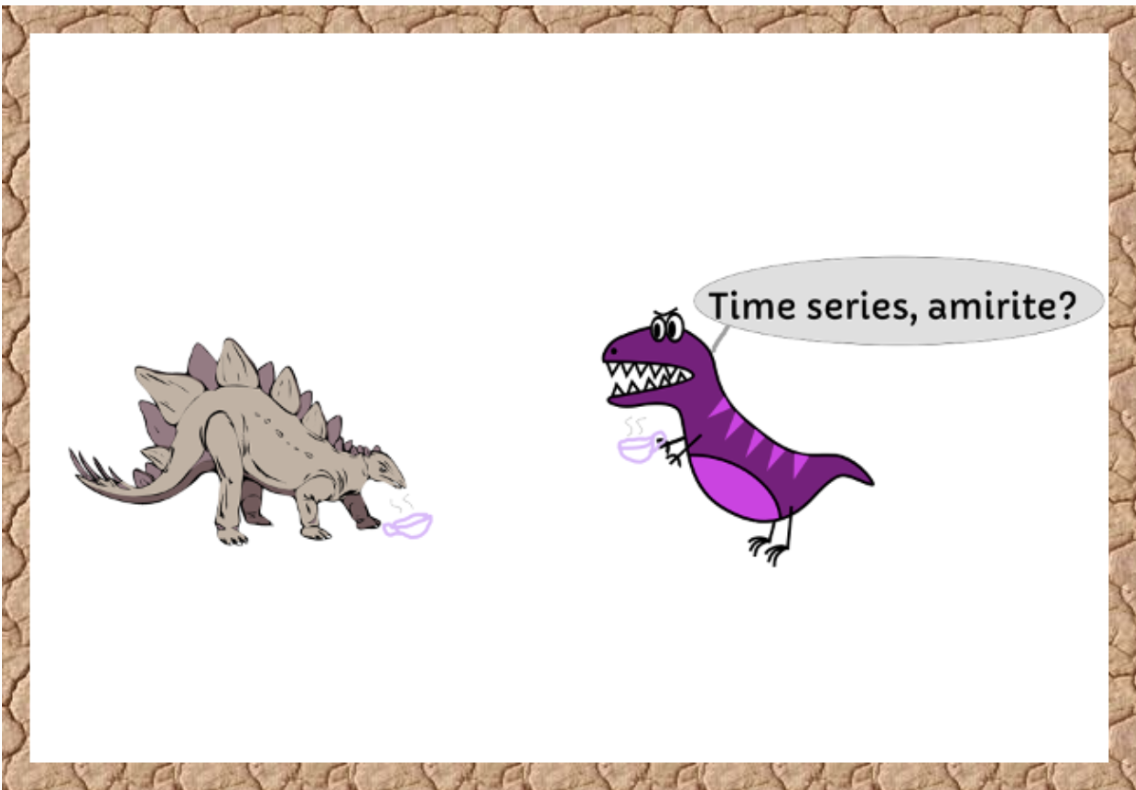

In [6]:
display_png(file="Images/time_series_dinosaur.png")

(Univariate) time series data is defined as sequence data over time: $X_1, X_2, ... , X_T$

where $t$ is the time period and $X_t$ is the value of the time series at a particular point

Examples: daily temperatures in Boston, US presidential election turnout by year, minute stock prices

Variables in time series models generally fall into three categories:

(1) endogenous (having an internal cause or origin) - i.e. daily temps in boston, previous daily temps

(2) random noise - usually unexpected events bound by confidence intervals. could be random shocks like hurricanes (could affect momentum in TS). lags not effective because don't expect hurricanes to frequently occur 

(3) exogenous (external cause) - other variables like month/season, can be useful but challenging, would need to know future value to make predictive forecasts

All time series models involve (1) and (2) but (3) is optional.

# Why Time Series?

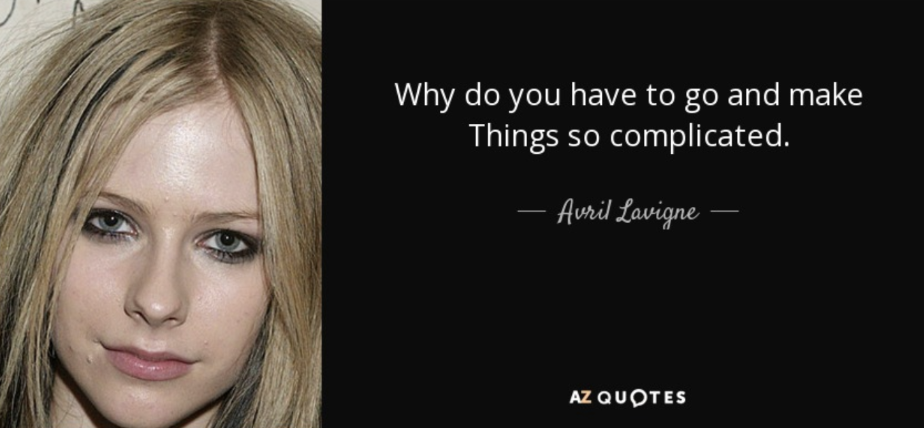

In [7]:
display_png(file="Images/time_series_complication.png")

The answer is that:

(1) many forecasting tasks actually involve small samples which makes machine learning less effective

(2) time series models are more interpretable and less black box than machine learning algorithms

(2) time series appropriately accounts for forecasting uncertainty.

As an example, lets look at the following data generating process known as a **random walk**: $X_t=X_{t-1}+\epsilon_t$

We can compare the forecasting performance of linear regression to that of a basic time series model known as an **AR(1) model.**

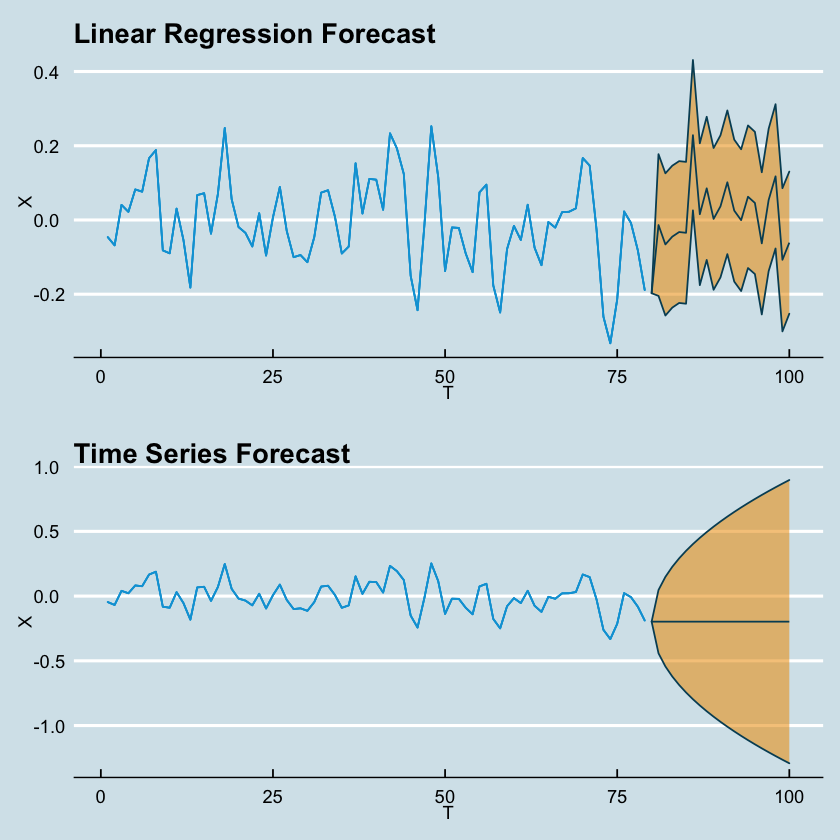

In [8]:
#run function to compare linear regression to basic AR(1) time series model
compare.models(n=100)

#time series = last period value and random term (random walk). best guess is previous period plus noise 
#vs auto regressive process (linear regression model)
#light blue is past simulated data, dark blue forecast, orange is resulting confidence intervals
#linear regression overfits past observations
#the TS model does much better job for predicting uncertainty (widens over time). 

#CI in TS model more of a function of how far out were predicting
#regression relies on past data points, X doesnt shrink over time (overfit)

# Key Concepts: Autocorrelation/Autocovariance

Autocorrelation/autocovariance refers to the correlation/covariance between two observations in the time series at different points.

The central idea behind it is how related the data/time series is over time.

For ease of interpretation we typically focus on autocorrelation i.e. what is the correlation between $X_t$ and $X_{t+p}$ for some integer $p$.

A related concept is partial autocorrelation that computes the correlation adjusting for previous lags/periods i.e. the autocorrelation between $X_t$ and $X_{t+p}$ adjusting for the correlation of $X_t$ and $X_{t+1}$, … , $X_{t+p-1}$.

When analyzing time series we usually view autocorrelation/partial autocorrelation in ACF/PACF plots.

Let's view this for the random walk model we analyzed above: $X_t=X_{t-1}+\epsilon_t$.

The autocorrelation of lag k of a time series is the correlation values of the series k lags apart. The partial autocorrelation of lag k is the conditional correlation of values separated by k lags given the intervening values of the series.

In [ ]:

#Autocorrelation is a mathematical representation of the degree of similarity between a given time series and a lagged version of itself over successive time intervals.

#similar to multiple linear regression 
#ACF and PACF plots

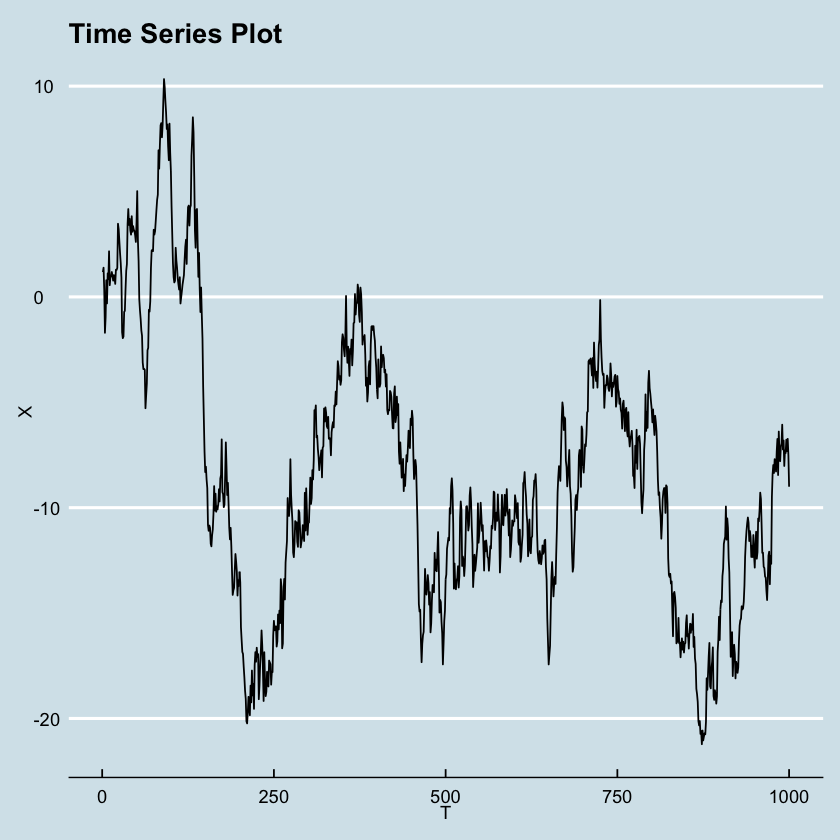

In [9]:
#simulate random walk
dat<-sim.random.walk() #sim random walk function 

#plot random walk
#ggplot function 
dat %>% ggplot(aes(t,X)) + geom_line() + xlab("T") + ylab("X") + ggtitle("Time Series Plot")


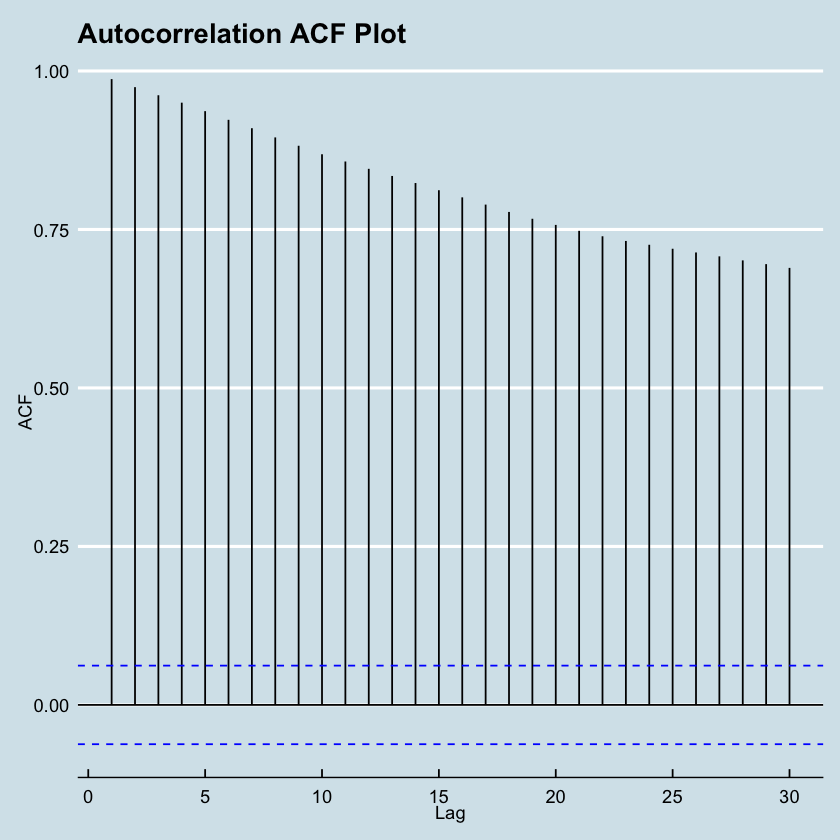

In [10]:
#ACF plot
ggAcf(dat$X,type="correlation") + ggtitle("Autocorrelation ACF Plot")

#ggAcf from forecast package 
#type equals correlation for ACF plot 
#y axis shows correlation between -1 and 1 and then we see successive lags 
#high correlation between lag and time series 
#gradually declines over time but stays high, over 0.5 even out to 30 lags 
#in dotted blue lines, confidence intervals for 95% hypothesis test 
#each line outside of interval, significant 


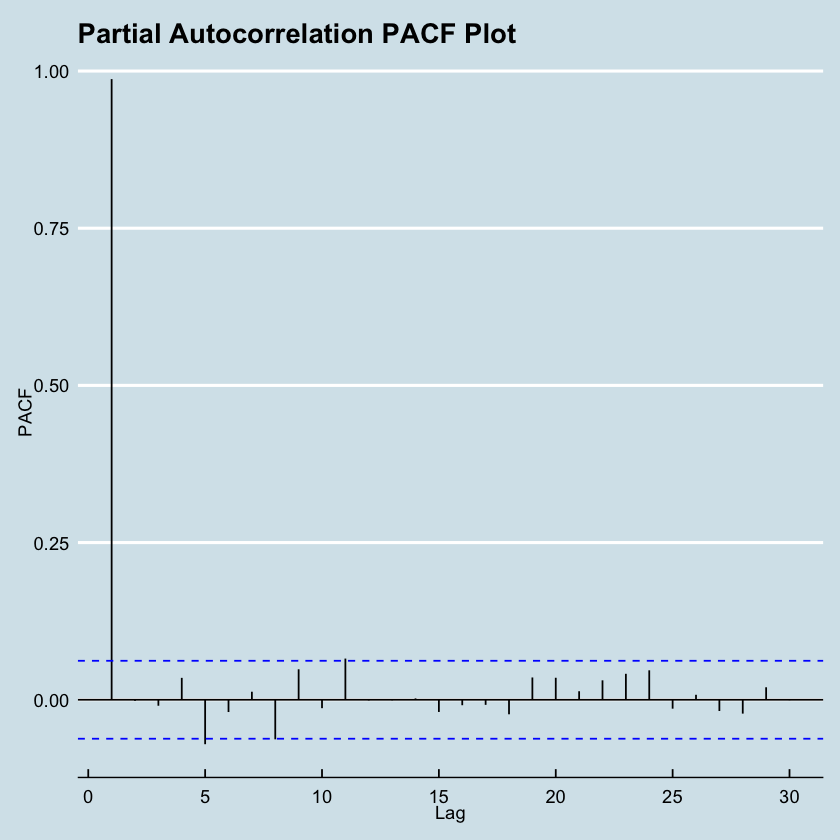

In [11]:
#PACF plot
ggAcf(dat$X,type="partial") + ggtitle("Partial Autocorrelation PACF Plot")
#type is partial for auto correlation plot
#in contrast to ACF, PACF only shows high degree correlation  between tiem periods 1 lag apart (not 2 3 4 etc)
#not very correlated after the 1 lag relationship is accounted for 
#makes sense because random walk links data to only 1 past period 

# Key Concept 2: Stationarity

The second key concept in time series is stationarity.

While the concept can get quite technical, the basic idea is examining whether the distribution of the data over time is consistent.

There are two main forms of stationarity.

(1) Strict stationarity imples:

The cumulative distribution function of the data does not depend on time:

$F_X(X_1,...,X_T)=F_X(X_{1+\Delta},...,X_{T+\Delta})$ $\forall \Delta\in\mathbb{R}$ 

(2) Weak stationarity implies:

- the mean of the time series is constant

$E(X_t)=E(X_{t+\Delta})$

- the autocovariance/autocorrelation only depends on the time difference between points

$ACF(X_{t},X_{t+\Delta-1})=ACF(X_1,X_{\Delta})$

- the time series has a finite variance

$Var(X_\Delta)<\infty$  $\forall \Delta\in\mathbb{R}$

notes
distribution of data across TS is constant. 

strict - joint distr does not depend ont ime 

weak - mean of TS is constant over time, 2nd autocov/autocorr depend on time diff between points, TS has finite variance 

basic TS models in this course (autoregressive, MA, autoregrr MA, etc, require weak stationarity)

mean revering behavior (in long run we expect mean TS to be constant)
stationary TS shouldnt be highly predictible, properties not deterministic w time, all deterministic components removed by detrending

# Checking for Stationarity

check for stationary/weak stationarity
use sim.stationary.example 

In [12]:
#create three time series for example (simulate time series)
df<-sim.stationary.example(n=1000)

#head and dim information of output of function 
head(df);dim(df)

#dataframe 1000 rows as input parameter n=1000, four columns
#time series index and 3 simulated time series for this example 
#x1 x2 nonstationary for this TS
#x3 is stationary 

t,X1,X2,X3
1,-0.8442552,-0.7351263,1.90453396
2,-0.9757362,2.1433992,0.08465675
3,-1.8599105,2.1913028,1.82839144
4,-0.5757518,3.2637697,-1.31471370
5,-0.1551173,6.2525801,0.04022343
6,-1.3534818,6.6406214,-0.81471658


[1] 1000    4

- Step 1 Check a plot of the time series over time and look for constant mean and finite variance i.e. values appear bounded.

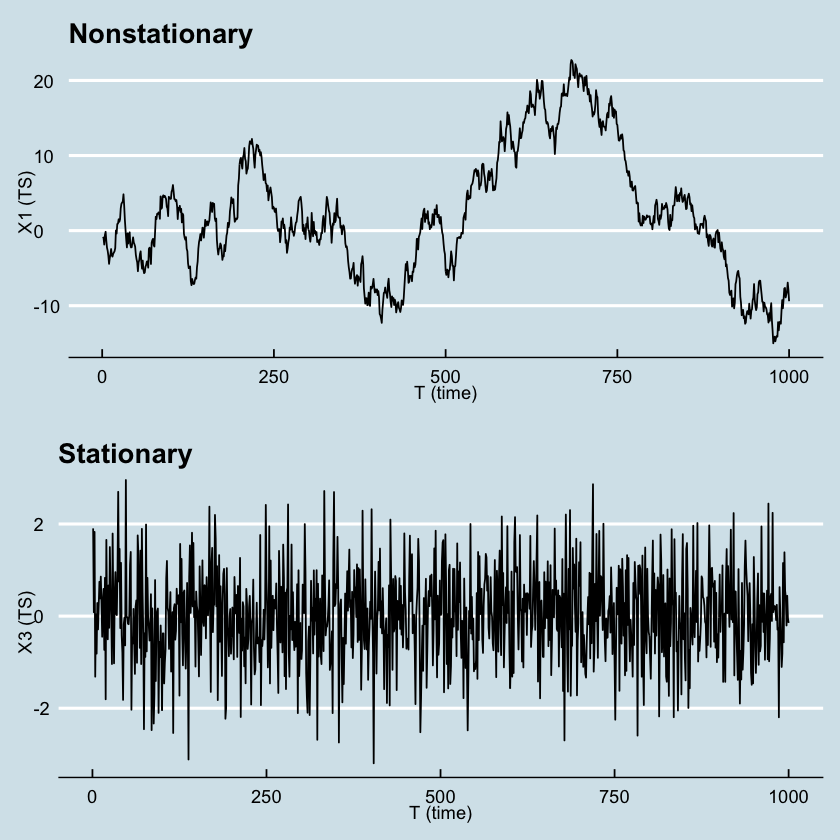

In [13]:
#plot nonstationary and stationary time series

#wnat to see constant mean and bounded X values imply finite variance
#ggplot function to plot TS then grid.arrange to view nonstationarity/stationarity comparisons 

#aes to,e amd X1. want line plot. x label. y label. title 
g1 <- ggplot(df,aes(x=t,y=X1)) + geom_line() + xlab("T (time)") + ylab("X1 (TS)") + ggtitle("Nonstationary")
g2 <- ggplot(df,aes(x=t,y=X3)) + geom_line() + xlab("T (time)") + ylab("X3 (TS)") + ggtitle("Stationary")

#plot and compare
grid.arrange(g1,g2)

#nonstationary, the mean does NOT look constant. changes through successive periods, values not very well bounded suggests non finite variance

#stationary, constant mean throughout time, well bounded values, suggest finite variance 

- Second option Look at the ACF plot and see if it dies off quickly as opposed to a gradual decline.

Stationary TS should experience Mean Reversion in a nondeterministic nature in the long run meaning correlation between successive TS flags should drastically approach zero quickly

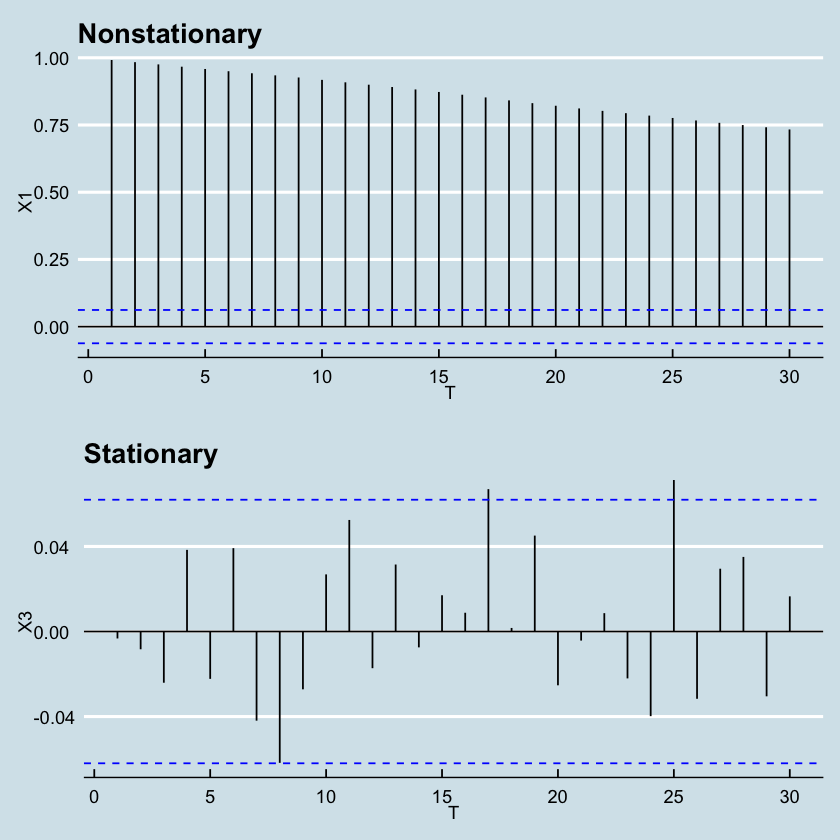

In [14]:
#ACF for nonstationary and stationary time series

#autocorrelation does not die off to zero and stays very high for a large # of lags in TS
#exhibiting non mean reverting behavior 
g1 <- ggAcf(df$X1,type="correlation") + xlab("T")+ylab("X1")+ggtitle("Nonstationary")

#almost no significant autocorrelations across lags 
g2 <- ggAcf(df$X3,type="correlation") + xlab("T")+ylab("X3")+ggtitle("Stationary")

grid.arrange(g1,g2)

- Third way to check for stationarity: Perform unit root hypothesis tests such as the Augmented Dickey–Fuller (ADF) test.

the NULL is nonstationarity, ALT is stationarity, so we want to see a sig p value in this H test

In [15]:
#perform unit test; nonstationary example has large, non-significant p-value
adf.test(df$X1)

#large non-significant p value suggests TS is NOT stationary 


	Augmented Dickey-Fuller Test

data:  df$X1
Dickey-Fuller = -1.7123, Lag order = 9, p-value = 0.7001
alternative hypothesis: stationary


In [17]:
#perform unit test; stationary example has small, significant p-value
adf.test(df$X3)

#small and sig imply stationarity

Warning message in adf.test(df$X3):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  df$X3
Dickey-Fuller = -10.595, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


# Transforming for Stationarity

## Differencing

Differencing involves taking differences between successive time series values.

The order of differencing is defined as p for $X_t-X_{t-p}$.

Let's transform a nonstationary time series to stationary by differencing with the random walk model.

In a random walk $X_t=X_{t-1}+\epsilon_t$ where $\epsilon_t\sim N(0,\sigma^2)$ iid.

Differencing with an order of one means that $\tilde{X}_t=X_t-X_{t-1}=\epsilon_t$.

differencing or detrending to transform to stationarity

ordering of differencing = number of time periods apart

in random walk model, we have the noise, normal zero sigma squared iid random noise terms 

the random noise terms have constant term finite variance 

In [18]:
#difference time series to make stationary
diff<-df$X1-lag(df$X1,1) 
#for every value in X1 it will subtract previous lag value performing differencing and give us transformed TS


original we see does not die off, exhibiting nonstationarity 
almost no sig autocorrelation lags, suggest stationarity, show differencing has worked, transformed from nonstationary to stationary

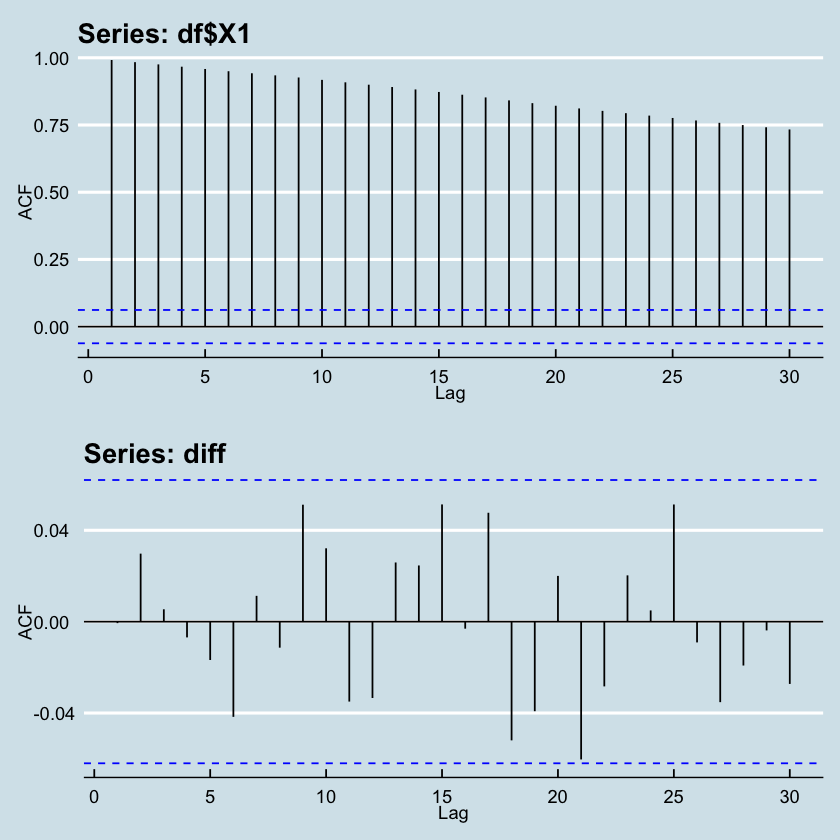

In [19]:
#plot original and differenced time series
g1<-ggAcf(df$X1,type="correlation")
g2<-ggAcf(diff,type="correlation")
grid.arrange(g1,g2)

## Detrending

Detrending involves removing a deterministic relationship with time.

As an example suppose we have the following data generating process $X_t=B_t+\epsilon_t$ where $\epsilon_t\sim N(0,\sigma^2)$ iid.

Detrending involves using the transformed time series $\tilde{X}_t=X_t-Bt=\epsilon_t$.

b is constant
epsilon is normal random noise term 

deterministic relationship with time 

xt tilda is xt minus b*t so transformed time series is the random noise term which is by definition stationary because constant mean and finite variance

in real world when detrending TS we dont know the relationship of time
build our model to predict our TS as a function of time 

take residuals as Xt tilda which will be stationary after we do some diagnostic testings

most common model to detrend TS is linear regression

In [20]:
#detrend time series to make stationary
#regress object X2 to index t specifying they come from df dataframe 
#call resid on the lm fitted object, calculate residuals store in detrended object
#store the detrended time series
detrended<-resid(lm(X2~t,data=df))

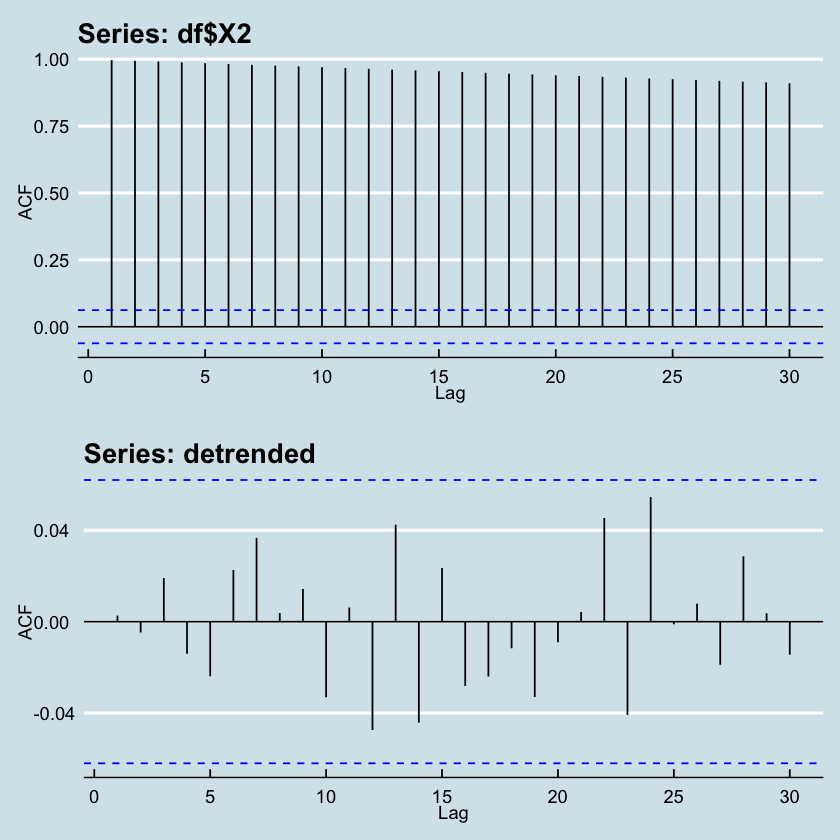

In [21]:
#plot original and detrended time series

#exhibits nonstationary
#doesnt die off to zero 
#significantly from zero autocorrelation across a high number of lags
g1<-ggAcf(df$X2,type="correlation")

#stationary
#none of the autocorrelations between lags are significantly diff from zero 
#detrending w linear regression helped transform TS from nonstationary to stationary
g2<-ggAcf(detrended,type="correlation")
grid.arrange(g1,g2)

# Basic Model Types: AR(p), MA(q), ARMA(p,q), ARIMA(p,d,q), Decomposition

## Autoregressive AR(p) Models

AR models specify $X_t$ as a function of lagged time series values $X_{t-1}$, $X_{t-2}$, ...

i.e $X_t=\mu+\phi_1 X_{t-1}+...+\phi_p X_{t-p}+\epsilon_t$

where $\mu$ is a mean term and $\epsilon_t\overset{iid}\sim N(0,\sigma^2)$ is a random error.

When fitting an AR model the key choice is p, the number of lags to include.

## Moving Average MA(q) Models

MA models specify $X_t$ using random noise lags:

$X_t=\mu+\epsilon_t+\Theta_1\epsilon_{t-1}+...+\Theta_q\epsilon_{t-q}$

where $\mu$ is a mean term and $\epsilon_t\overset{iid}\sim N(0,\sigma^2)$ is a random error.

Similar to an AR model, when fitting an MA model the key choice is q, the number of random shock lags.

## Autoregressive Moving Average ARMA(p,q) Models

ARMA(p,q) models are a combination of an AR and MA model:

$X_t=\mu+\phi_1 X_{t-1}+...+\phi_p X_{t-p}+\epsilon_t+\Theta_1\epsilon_{t-1}+...+\Theta_q\epsilon_{t-q}$

where $\mu$ is a mean term and $\epsilon_t\overset{iid}\sim N(0,\sigma^2)$ is a random error.

When fitting an ARMA model, we need to choose two things: p, the number of AR lags, and q, the number of MA lags.

## Autoregressive Integrated Moving Average ARIMA(p,d,q) Models

ARIMA(p,d,q) is an ARMA model with differencing.

When fitting an ARIMA model we need to choose three things: p, the number of AR lags, q, the number of MA lags, and d, the number of differences to use.

## Decomposition Models

Decomposition models specify $X_t$ as a combination of a trend component ($T_t$), seasonal component ($S_t$), and an error component/residual ($E_t$) i.e. $X_t=f(T_t,S_t,E_t)$.

Common decomposition forms are: $X_t=T_t+S_t+E_t$ or $X_t=T_t*S_t*E_t$ (where then take logs to recover the additive form).

There are various ways to estimate the different trend components: exponential smoothing, state space models/Kalman filtering, STL models, etc.

In this project we will cover STL models because of their ease of use and flexibility.

- AR models, function of lagged time series
- Xt is intercept plus combination of lag values and error term 
- use model to extimate fi i parameters using different types of equations (like max likelihood and LR)
- can be nonstationary, use unit root 
- view time series over time, ACF/autocorrelation or ADF test to test stationarity 
- because we depend on lagged x values, random noise terms in past periods can have future influences on future, conceptually process can be nonstationary. past large shocks cause series to diverge, non mean reverting, infinite variance 
- p, number of lags to include in model (key choice)


- MA moving average similar to AR but instead of past value lag TS, use past lag random shock/error terms. specify Xt as mean term, random noise current period, linear combinarion of past noise terms 
- because MA models specify X as a model of past random noise terms, fitting them is a bit more complicated, need iterative fitting methods
- past random shocks, by construct stationary bc random noise are independent and identically distributed, finite variance 
- model X on finite number rnaodm lags, past shocks affect finite future periods 
- whatever past randoms hocks, influence goes to zero, therefore TS will be mean reverting 
- key choice is Q for number of random shock lags 

- autoregressive MA (ARMA), combination of AR and MA models. Xt is mean term, random noise term current period, linear comvination of past lag TS values and past random noise terms 
- choose p and q 

- ARIMA (p,d,q)
- ARMA models but add in differencing, take diff between TS at successive points in time 

- Decomposition Models 
- completely diff from above. specify TS as comb of T, S, and error/residual with time. model as function of these comp
- assuem Xt is additive comb of these components or multiplicative, take logs of multiplicationt o recover additive form
- est. trend components in diff ways 
- we will cover STL models in this project showcase what composition models look like

# Fitting AR/MA/ARMA/ARIMA models with the Box Jenkins Method

We will now go over how to fit AR/MA/ARMA/ARIMA models on a real data set and review a generic strategy for fitting them known as the Box Jenkins method. 

This process involves several steps to help identify the p, d, and q parameters that we need:

- Identify whether the time series is stationary or not

- Identify p, d, and q of the time series by

  - Making the the time series stationary through differencing/detrending to find d
  
  - Looking at ACF/PACF to find p and q
  
  - Using model fit diagnostics like AIC or BIC to select the best model to find p, d, and q

- Check the model fit using the Ljung–Box test

- box jenkins method 
- need p, d, q parameters 
- steps above (3) 
- ID stationary (TS, ACF, ADF test)
- transform nonstationary to stationary TS through differencing/detrending (give us d parameters)
- ACF/PACF for p and q 
- model fit diag. select best model (allow us to ID p, d, q simultaneously, best method to choose, better than doign more explatory things like using plotting diagnostics)
- check model fit, run residuals through ljung box test (lee yung)

In [22]:
#load data
#check for stationarity in TS data 
#monthly unemployment rate from fed database (great resource for econ data)
#load in data, look at df 
ur<-read.csv("Data/Mass Monthly Unemployment Rate.csv")
head(ur);dim(ur)

#one column date column another is monthly unemployment rate 
#date variables don't always get loaded correctly, let's check the class

DATE,MAURN
1976-01-01,11.6
1976-02-01,11.3
1976-03-01,10.9
1976-04-01,9.9
1976-05-01,9.4
1976-06-01,9.8


[1] 529   2

In [25]:
#check date class
class(ur$DATE) 

#need to transform from class to date

[1] "Date"

In [24]:
#change date class to date type
ur$DATE<-as.Date(ur$DATE)

## Checking for Stationarity

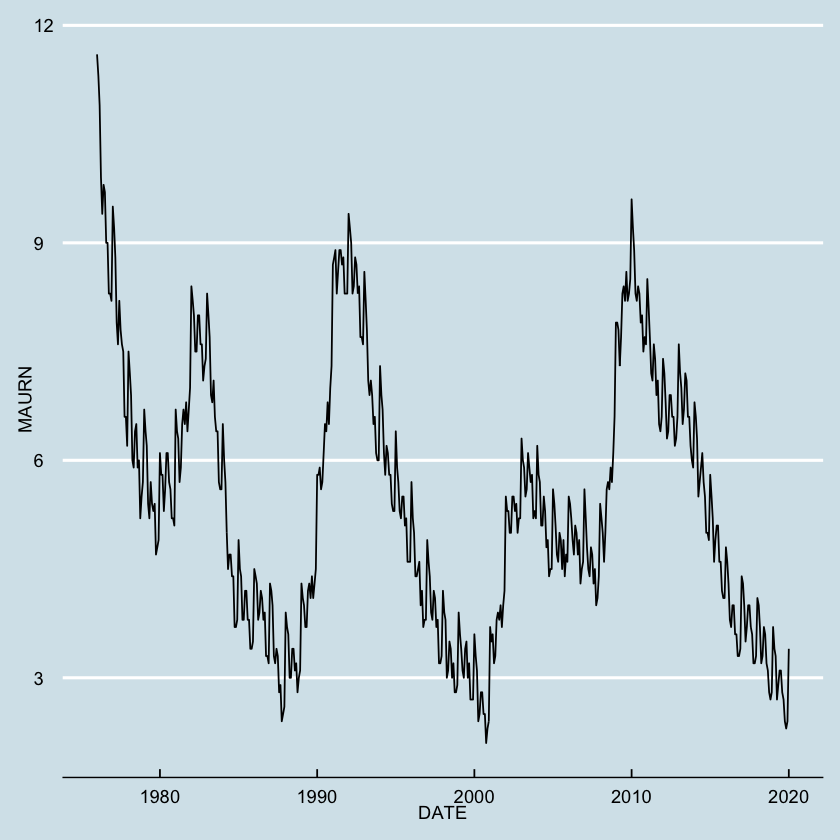

In [26]:
#check time series plot
#time series over time usign ggplot on ur object specify 
ggplot(ur,aes(x=DATE,y=MAURN))+geom_line()

#we can see that generally teh values dont look well boudned
#mean does not look constnat over time
#TS not stationary, need to transform with differencing or detrending

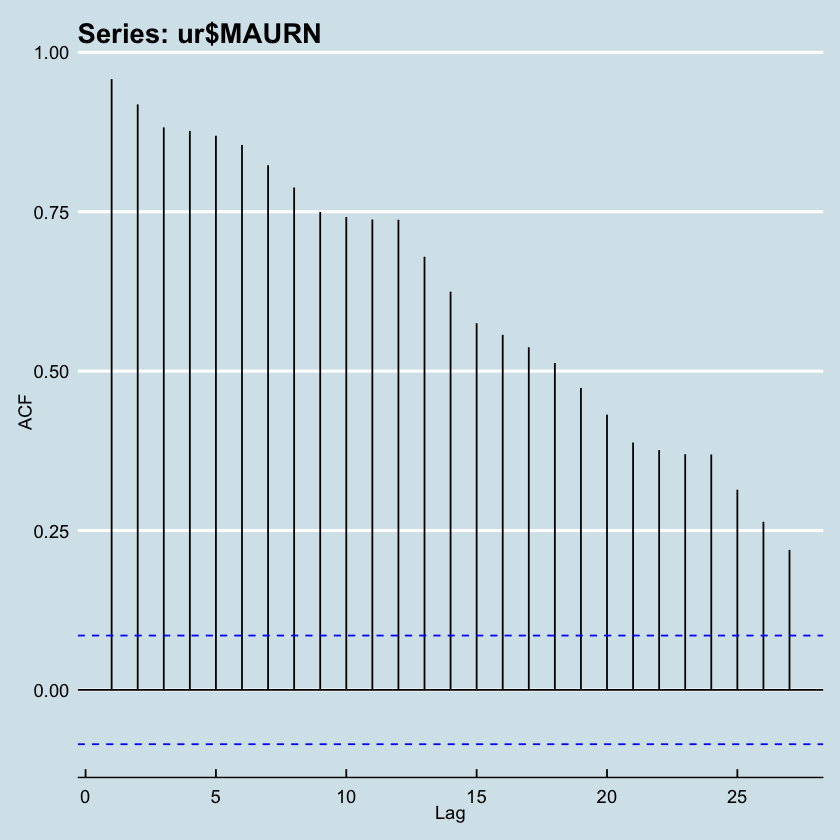

In [27]:
#check ACF plot (OPTION 2)

ggAcf(ur$MAURN,type="correlation")
#doesn't exhibit quickly dying off behavior like stationary, suggest TS nonstationary

In [28]:
#run ADF test (third option)
adf.test(ur$MAURN)

#nonsignificant  means nonstationarity so NEED TO TRANSFORM 

#now we go to next part of box jenkins process (transforming)


	Augmented Dickey-Fuller Test

data:  ur$MAURN
Dickey-Fuller = -3.0954, Lag order = 8, p-value = 0.1146
alternative hypothesis: stationary


## Transforming for Stationarity & Identifying Model Parameters

chooses optimal p d q based on AIC or BIC (model fit criteria)
can transform to find optimal amt of differencing
and find paramters that fit optimally

In [29]:
#1) fit AR model
ar.model<-auto.arima(ur$MAURN,max.d=0,max.q=0,allowdrift=T) 
#when fitting this model we dont want any differencing or random noise terms whcih is characteristic of an AR model
#T means intercept or mean term allowed
ar.model

#optimal means p = 1 for 1 autoregressive lag 


Series: ur$MAURN 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1    mean
      0.9787  5.7425
s.e.  0.0101  0.8498

sigma^2 estimated as 0.2:  log likelihood=-325.44
AIC=656.88   AICc=656.93   BIC=669.7

In [30]:
#2) fit MA model
#only diff, set max.p to zero meaning no include past lag time seriers but allow lag of random noise terms 
ma.model<-auto.arima(ur$MAURN,max.d=0,max.p=0,allowdrift=T) 
ma.model

#optimal moving avg model monthly unemployment includes q = 5, 5 lag ma terms 


Series: ur$MAURN 
ARIMA(0,0,5) with non-zero mean 

Coefficients:
         ma1     ma2     ma3     ma4     ma5    mean
      1.3646  1.7103  1.4882  1.2714  0.4804  5.4588
s.e.  0.0368  0.0492  0.0578  0.0393  0.0350  0.1507

sigma^2 estimated as 0.229:  log likelihood=-361.03
AIC=736.05   AICc=736.27   BIC=765.95

In [31]:
#3) fir ARMA model
#max.d is still zero, no differencing
#allow p and q to be nonzero 
arma.model<-auto.arima(ur$MAURN,max.d=0,allowdrift=T) 
arma.model

#p is 3 q is 2, 3 lagged autoregressive terms 2  random ma shock terms in optimal arma model fit

Series: ur$MAURN 
ARIMA(3,0,2) with non-zero mean 

Coefficients:
          ar1     ar2     ar3     ma1     ma2    mean
      -0.2266  0.5998  0.5573  1.3361  0.8876  5.7037
s.e.   0.0885  0.0544  0.0569  0.0543  0.0221  0.7763

sigma^2 estimated as 0.1693:  log likelihood=-280.15
AIC=574.3   AICc=574.51   BIC=604.19

In [33]:
#4) fit ARIMA model
#nonzero differencing
arima.model<-auto.arima(ur$MAURN,allowdrift=T) 
arima.model

#4 lagged x values 1 ordered differencing 2 random noise or MA terms in optimal model fit

#fitting various classes of TS models easy with "auto.arima" function in R 

Series: ur$MAURN 
ARIMA(4,1,2) 

Coefficients:
         ar1      ar2      ar3     ar4      ma1     ma2
      1.0029  -0.1834  -0.3982  0.4872  -1.1149  0.2512
s.e.  0.0708   0.0750   0.0560  0.0394   0.0793  0.0711

sigma^2 estimated as 0.1509:  log likelihood=-247.45
AIC=508.9   AICc=509.12   BIC=538.78

## Checking the Residuals of the Model Fit

In [36]:
#calculate residuals of each model
#to see if white noise, Ljung model test
#ensure model fit is appropriate 
#Ljung has null of white noise residuals
#want to fail to reject null hypothesis 
#for each stored model we find residuals using resid function 

ar.residual<-resid(ar.model)
ma.residual<-resid(ma.model)
arma.residual<-resid(arma.model)
arima.residual<-resid(arima.model)


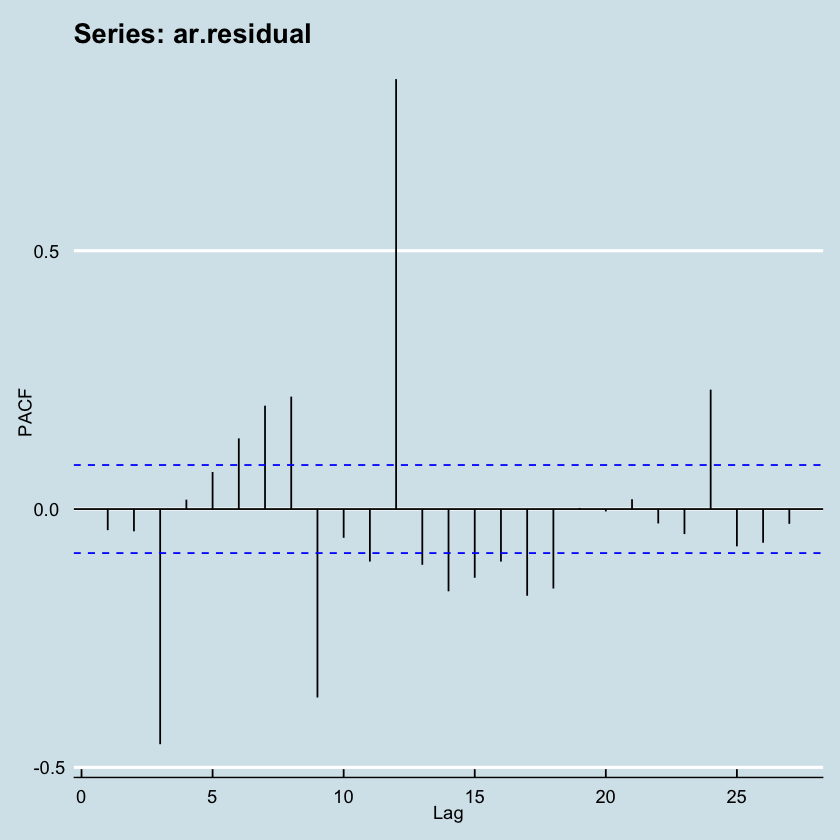

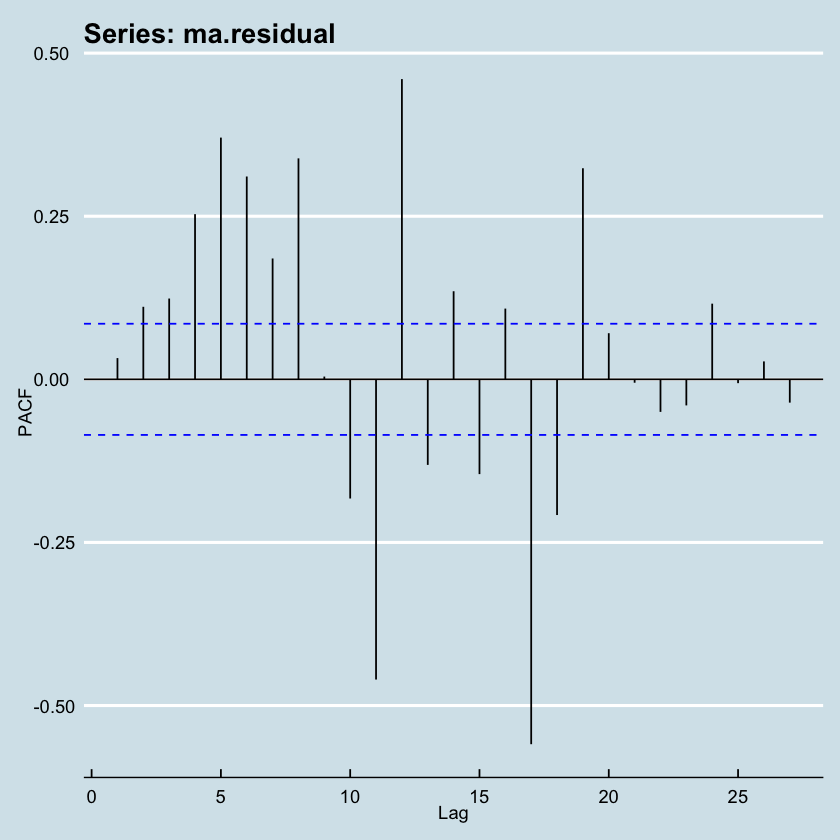

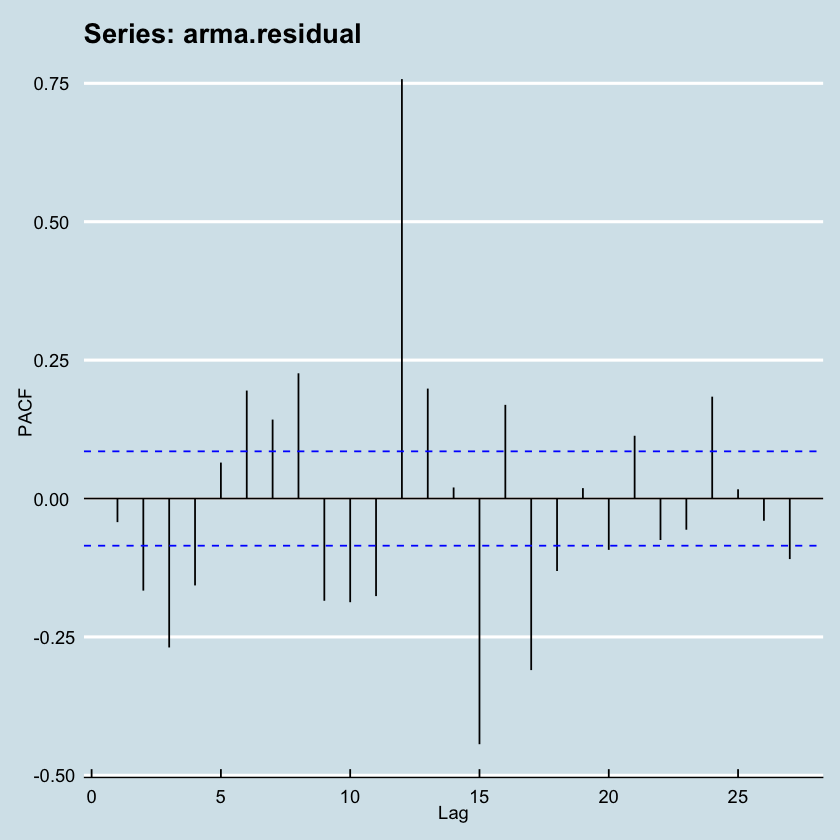

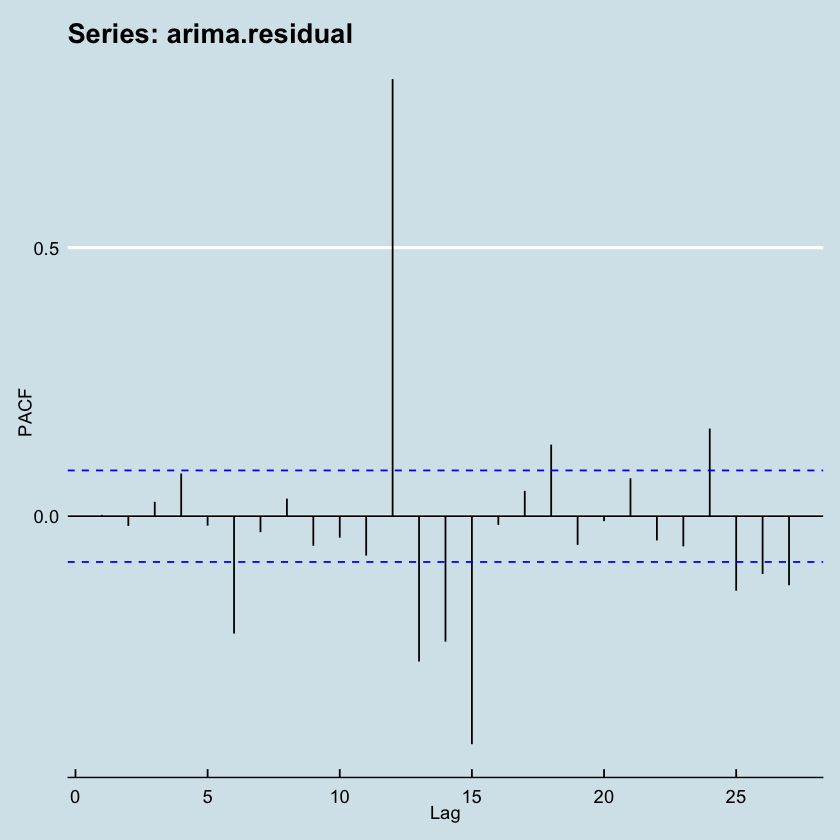

In [37]:
#plot PACF plot of each models residuals
#see if white noise or not (white noise means zero autocorrelation across any lags)
#partial autocorrelation plot, ggAcf function on each saved residuals

ggAcf(ar.residual,type="partial")
ggAcf(ma.residual,type="partial")
ggAcf(arma.residual,type="partial")
ggAcf(arima.residual,type="partial")

#generally PACF looks fine, for some far back lags we see significant diff than zero autocorrelation 
#expect this to happen sometimes though, high degree for long lag values
#look for initial terms to have zero autocorrelation 

#ma.residual looks a bit more problematic, earlier values show significant autocorrelation 
#arma.residual too

#arima looks most well-behaved, least sig. autocorrelations except past lags, suggest best behaved model fit 

In [38]:
#run the Ljung Box test on the residuals
#see how they behave statistically 
#specify Ljung Box and number of lags (we use lag =1 test autocorr. up to 1)
Box.test(ar.residual,type="Ljung-Box",lag=1)
Box.test(ma.residual,type="Ljung-Box",lag=1)
Box.test(arma.residual,type="Ljung-Box",lag=1)
Box.test(arima.residual,type="Ljung-Box",lag=1)
#look at p values
#we see for residuals, we FAIL TO REJECT NULL HYPOTHESIS OF WHITE NOISE RESIDUALS UP TO 1 LAG across 4 diff model types
#in each case p value greater than 0.05
#we have reasonably well behaved residuals no matter what model, 
#dont need to worry about nonstationarity
#can use these for forecasts 



	Box-Ljung test

data:  ar.residual
X-squared = 0.88802, df = 1, p-value = 0.346



	Box-Ljung test

data:  ma.residual
X-squared = 0.56386, df = 1, p-value = 0.4527



	Box-Ljung test

data:  arma.residual
X-squared = 0.96797, df = 1, p-value = 0.3252



	Box-Ljung test

data:  arima.residual
X-squared = 0.0032696, df = 1, p-value = 0.9544


## Making a forecast for each model

In [39]:
#make forecast for each model
#forecast function from forecast package 
#specify model and number of time steps ahead to make prediction (h), confidence level with level parameter
#monthly data, 2 years out 24, level 80 for 80% CI 
ar.forecast<-forecast(ar.model,h=24,level=80)
ma.forecast<-forecast(ma.model,h=24,level=80)
arma.forecast<-forecast(arma.model,h=24,level=80)
arima.forecast<-forecast(arima.model,h=24,level=80)

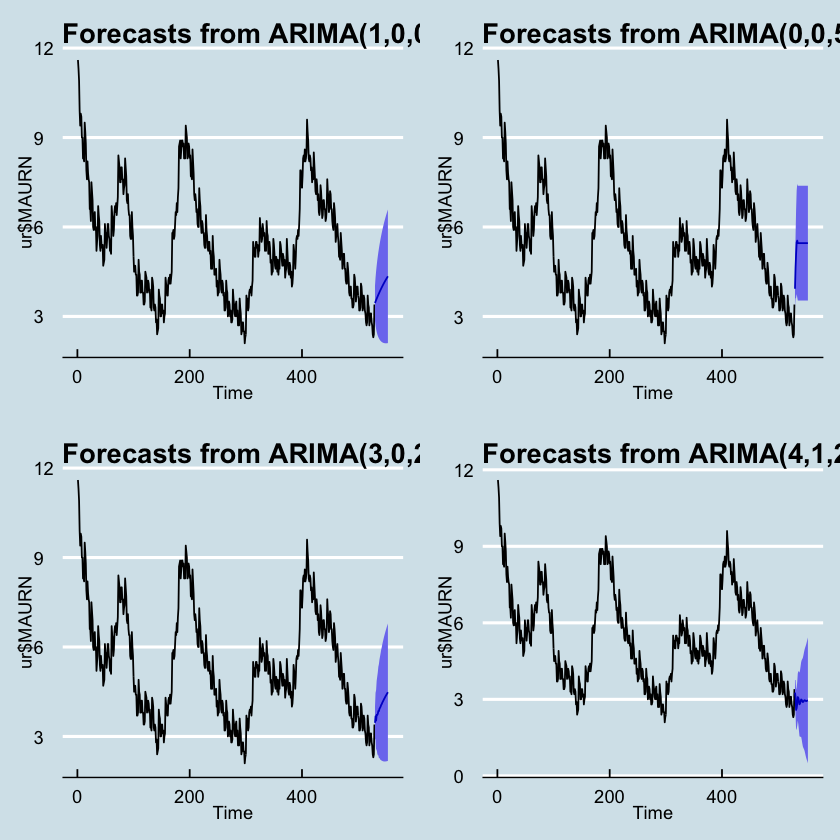

In [40]:
#plot forecast for each model
g1<-autoplot(ar.forecast)
g2<-autoplot(ma.forecast)
g3<-autoplot(arma.forecast)
g4<-autoplot(arima.forecast)

grid.arrange(g1,g2,g3,g4,nrow=2,ncol=2)

#we see forecast for each fitted models
#forecast for regressive, ma, arma, and arima
#in each case we can see that generally our TS models think the unemploymetn will INCREASE in coming 2 years
#fall within 2-6% with 80% confidence interval 

# Fitting Seasonal Trend Loess (STL) Decomposition Models

how to fit STL or seasonal trend loess decomposition models

STL models assume additive decomposition into TS into 3 parts (trend, seasonal, residual)

trend is LR behavior of TS, estimate something similar to a linear time trend that we saw in the detrending section 

seasonal,suggesting TS varies within a known period in a similar fashion such as monthly characteristic behavior or quarterly characteristic behavior 

residual cant be modeled by trend or seasonal 

STL Loess regression, method for local linear regression, applies more weight to data closer in time to the point of estimation and less weight as we get farther away sample points. tries to estimate flexible nonparametric form for the trend in seasonal components that upweights information closer to current date, trying to est. things flexibly 

STL models are computed in TWO LOOP
inner first loops compute trend and seaonal components using deseaonalized, previous

deseasonalizing means subtract current seasonal/trend components 

outer second loop computes residuals, difference trend and seasonal components at that iteration

model runs these two loops until it converges, provide estimation of time series broken down into these three factors 



need to do this first

specify frequency of data first (we use 12 bc monthly data for monthly unemployment rate)

first we need to TRANSFORM to TS function in R (req by STL function for estimation). use TS function in R


In [42]:
#transform to time series object; need to specify frequency
#time series object of dataset stored here and call stl function on this
ur.ts<-ts(ur$MAURN,frequency=12)

In [43]:
#fit stil model
#call stl on our time series dataset, specify that s.window (window of seasonal component) is periodic
#seasonal component similar periods
#fitted stl model now, can plot it now
stl.model<-stl(ur.ts,s.window="periodic")

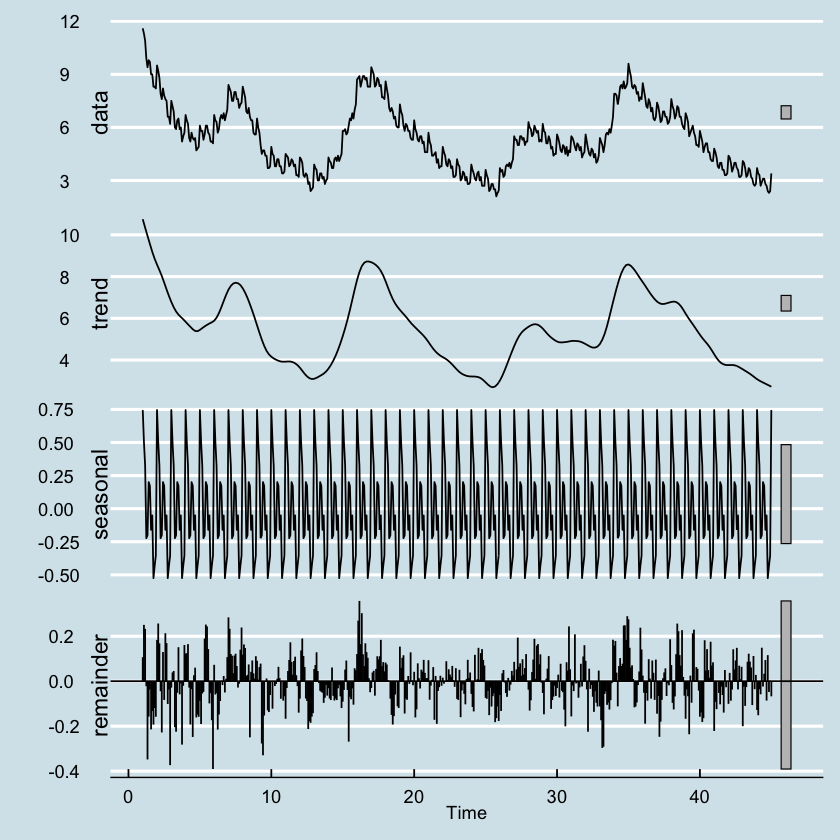

In [44]:
#plot model fit
autoplot(stl.model)

#our TS is broken down into three components
#top is original time series (actual)
#trend component (2)
#seasonal component, period behvaior within soem defined period
#remainders that we can actually model 

#breaks TS into intuitive components 
#LT trend component, seasonal, and random error that we can't model appropriately, can better understand behavior of our TS

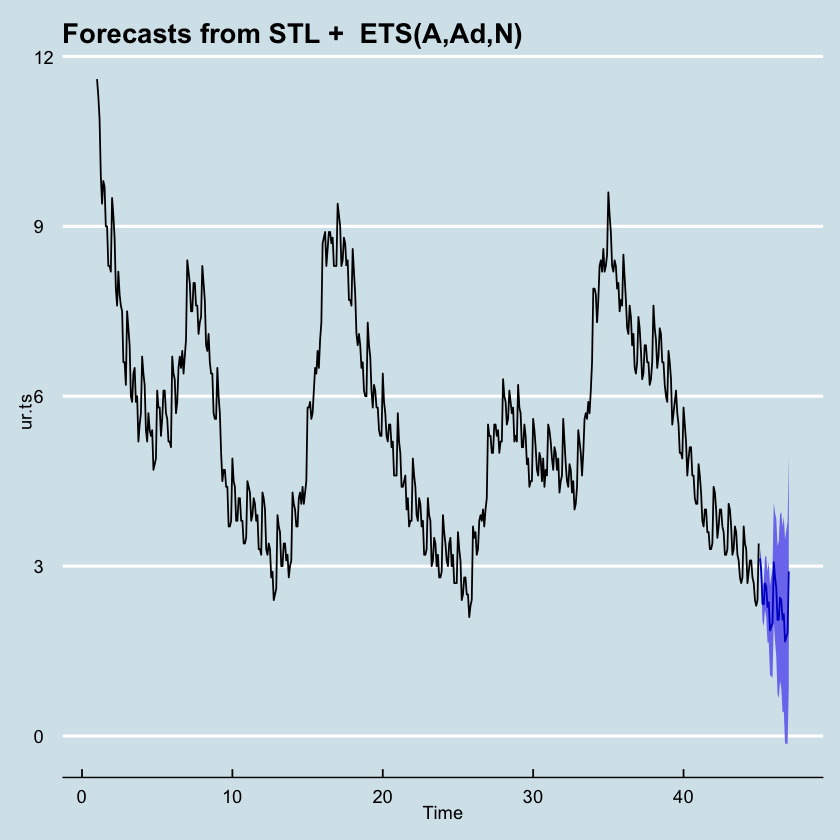

In [45]:
#make forecast of monthly unemployment rate now 
stl.forecast<-forecast(stl.model,h=24,level=80)

autoplot(stl.forecast)

#we see that we have fitted time series, past values, and then in blue we have future forecast values, dark blue is actual forecast, shaded region is confidence intervals
#contrary to other models, this one thinks  unemployment either stays same or decrease,
#narrow range of values, around 0 to 3 percent
#each model will learn diff information from time series (so each model has diff results)



# Where to go Next

- Advanced time series models
  - ARCH, GARCH, etc. that model changing variance over time
- Vector Autoregression (VAR)
  - For multivariate i.e. multiple time series and modeling dependencies between them
- Machine Learning
  - How to do CV with time series
  - Neural networks for sequence data (LSTMs, etc.)
- Spatial Statistics
  - Generalize time dependence to spatial dependence in multiple dimensions
- Econometrics
  - Cointegration
  - Granger Causality
  - Serial correlation
  - Regression with time series data
- Bayesian time series

arch and garch change assumptions about finite variance/constnat variance, flexibly allow variance over time (popular for financial TS analysis)

VAR, multiple variable time series, how they relate with each other over time (i.e. policy analysis, estimate resulting impact of changing things)

Machine learning - cross validation with TS, models in neural networks like sequence data, LSTMs

Spatial - spatial dependence, geography/geology

Econometrics - 

Bayesian - 



# QUIZ


Question 1
Time series model confidence intervals are mostly a function of what? The forecast horizon


Question 2
Weakly stationary time series models have the following characteristics: Finite variance, constant mean over time, autocorrelation over time that only depends on lag order (depends only on lag order in stationary series)

Question 3
Autoregressive (AR) models always stationary. TRUE or FALSE. False

Question 4
The autocorrelation plot below suggests the time series is stationary. TRUE or FALSE.

Question 5 
The following call to auto.arima fits which time series model?
auto.arima(time.series.max.d=0,allowdrift=T) = ARMA

Question 6
Why are STL decomposition models useful? interpretable, estimate seasonality. while we DO est. residual component in decomposition models, this comopnent is by definition UN-FORRECASTABLE and unknown until we observe future data

Question 7
Ljung-Box tests are used to test _____ and rejecting the null hypothesis means _____?
 the null hypothesis of the Ljung Box test is stationarity.

.
Question 8
What does the h parameter in the forecast function below refer to?
forecast(time.series.model,h=??,level=??)
number of periods forecast ahead

Non time series model CI widen as forecast horizon increases is FALSE. i.e. LR model overfit, does not widen

Moving average models ALWAYS STATIONARY. sum of finite past random shock lags so by construct are stationary

Level parmeter = confidence interval, h parameter is  number of periods to forecast ahead (forecast())